<div style="text-align: center;">
  <h1>
    <img src="download.png" alt="Alt text" style="position: relative; left: -30px; vertical-align: middle;"> YouTube
  </h1>
</div>


## About the Dataset

This dataset contains information about the top 500 most subscribed YouTube channels as of [23-06-2024]. The dataset includes details such as the rank of the channel, the name of the channel, the total number of videos uploaded, total number of views, total number of subscribers, and the category of the channel. Below is a description of each column in the dataset:

- **RANK**: The numerical ranking of the channel based on its number of subscribers.
- **NAME_OF_CHANNEL**: The name of the YouTube channel.
- **TOTAL_NUMBER_OF_VIDEOS**: The total number of videos uploaded by the channel.
- **SUBSCRIBERS**: The total number of subscribers of the channel.
- **VIEWS**: The total number of views accumulated by the channel across all videos.
- **CATEGORY**: The category or genre of content the channel primarily produces (e.g., Entertainment, Music, Kids, etc.).

### Example Rows:

| RANK | NAME_OF_CHANNEL             | TOTAL_NUMBER_OF_VIDEOS | SUBSCRIBERS | VIEWS   | CATEGORY    |
|------|-----------------------------|------------------------|-------------|---------|-------------|
| #1   | MrBeast                     | 799                    | 274M        | 50.98B  | Entertainment|
| #2   | T-Series                    | 21.12K                 | 267M        | 257.16B | Music       |
| #3   | Cocomelon - Nursery Rhymes  | 1.18K                  | 176M        | 182.88B | Kids        |
| #4   | SET India                   | 138.97K                | 173M        | 164.71B | Entertainment|
| #5   | ✿ Kids Diana Show           | 1.22K                  | 123M        | 103.5B  | Kids        |

### Dataset Characteristics:

- **Numerical Columns**: RANK, TOTAL_NUMBER_OF_VIDEOS, SUBSCRIBERS, VIEWS.
- **Categorical Columns**: NAME_OF_CHANNEL, CATEGORY.

The dataset provides a comprehensive overview of the top-performing YouTube channels, allowing for analysis of trends and patterns in video content, subscriber counts, and overall views across different categories.


In [20]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#Remove Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#loading the dataset
df = pd.read_csv('youtube.csv')
df.head()

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799,274M,50.98B,Entertainment
1,#2,T-Series,21.12K,267M,257.16B,Music
2,#3,Cocomelon - Nursery Rhymes,1.18K,176M,182.88B,Kids
3,#4,SET India,138.97K,173M,164.71B,Entertainment
4,#5,✿ Kids Diana Show,1.22K,123M,103.5B,Kids


# Data Preprocessing Part 1

In [5]:
# Check for missing values
print(df.isnull().sum())

RANK                      0
NAME_OF_CHANNEL           7
TOTAL_NUMBER_OF_VIDEOS    0
SUBSCRIBERS               0
VIEWS                     0
CATEGORY                  8
dtype: int64


In [6]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [7]:
# Remove '#' from RANK and convert to numeric
df['RANK'] = df['RANK'].str.replace('#', '').astype(int)

In [8]:
# Convert necessary columns to numeric types, removing commas and 'K', 'M', 'B' for thousands, millions, billions
def convert_to_number(x):
    if 'K' in x:
        return float(x.replace('K', '')) * 1e3
    elif 'M' in x:
        return float(x.replace('M', '')) * 1e6
    elif 'B' in x:
        return float(x.replace('B', '')) * 1e9
    else:
        return float(x.replace(',', ''))

In [9]:
df['TOTAL_NUMBER_OF_VIDEOS'] = df['TOTAL_NUMBER_OF_VIDEOS'].apply(convert_to_number)
df['SUBSCRIBERS'] = df['SUBSCRIBERS'].apply(convert_to_number)
df['VIEWS'] = df['VIEWS'].apply(convert_to_number)

# Exploratory Data Analysis (EDA)

In [10]:
# Summary statistics
print(df.describe())

             RANK  TOTAL_NUMBER_OF_VIDEOS   SUBSCRIBERS         VIEWS
count  485.000000              485.000000  4.850000e+02  4.850000e+02
mean   248.224742            13508.169072  3.514227e+07  1.890496e+10
std    143.323512            44593.703406  2.358655e+07  2.075998e+10
min      1.000000                1.000000  2.050000e+07  1.390000e+03
25%    124.000000              546.000000  2.370000e+07  8.710000e+09
50%    249.000000             1320.000000  2.840000e+07  1.464000e+10
75%    371.000000             4390.000000  3.860000e+07  2.297000e+10
max    497.000000           379590.000000  2.740000e+08  2.571600e+11


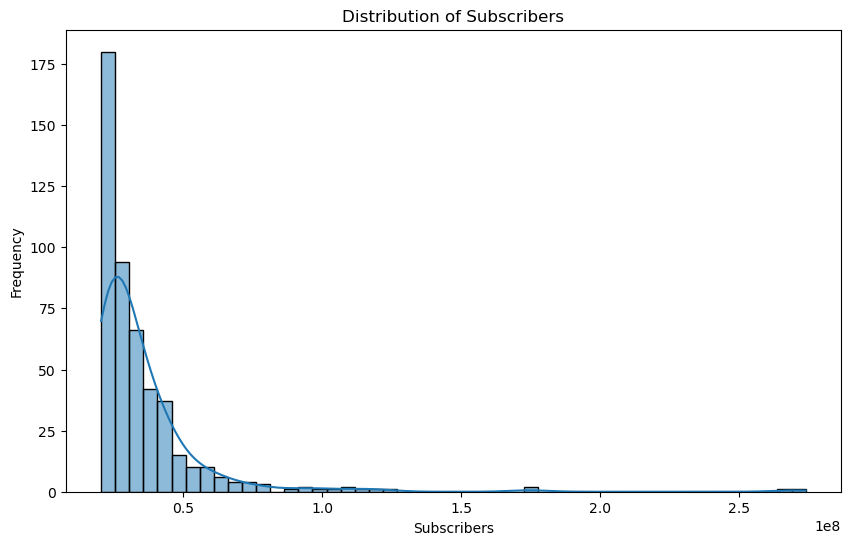

In [11]:
# Distribution of Subscribers
plt.figure(figsize=(10, 6))
sns.histplot(df['SUBSCRIBERS'], bins=50, kde=True)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()

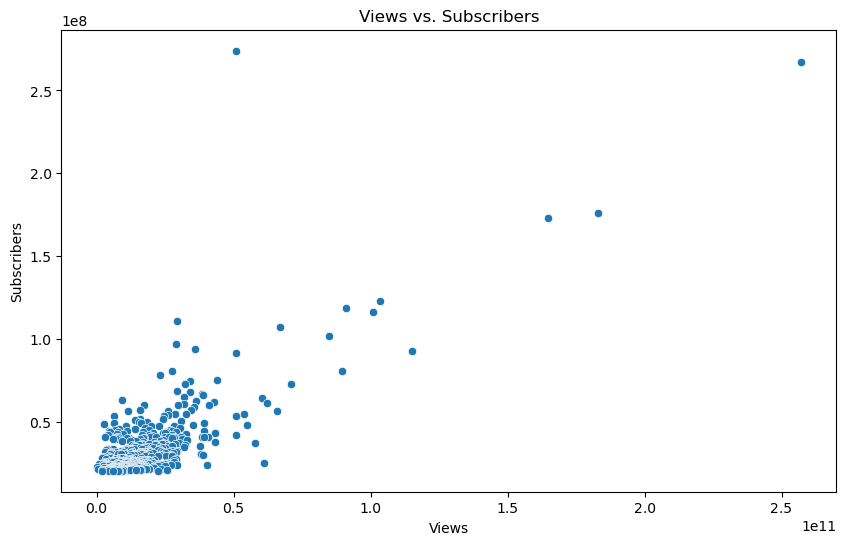

In [12]:
# Scatter plot of Views vs. Subscribers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VIEWS', y='SUBSCRIBERS', data=df)
plt.title('Views vs. Subscribers')
plt.xlabel('Views')
plt.ylabel('Subscribers')
plt.show()

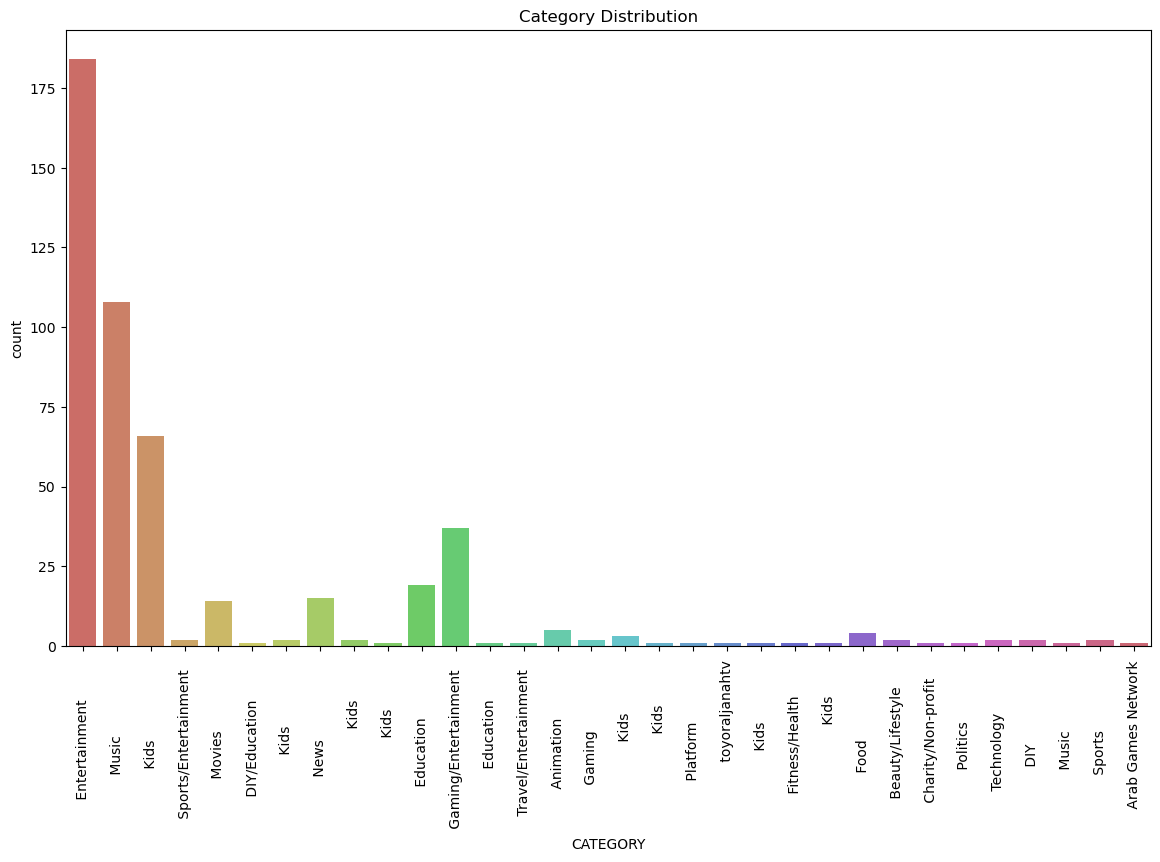

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the count plot
plt.figure(figsize=(14, 8))
ze = sns.countplot(x='CATEGORY', data=df, palette='hls')
ze.set_title('Category Distribution')

# Rotating the x-tick labels
ze.set_xticklabels(ze.get_xticklabels(), rotation=90)

# Display the plot
plt.show()


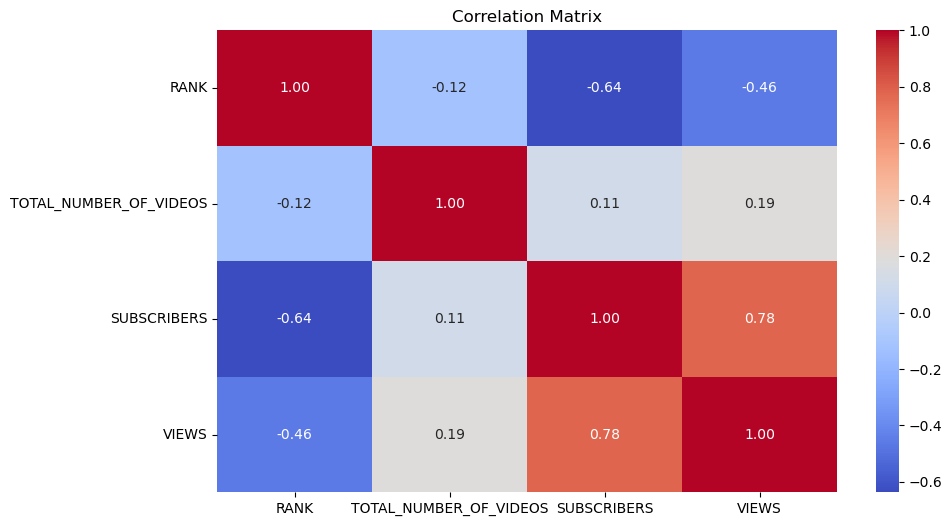

In [14]:

# Correlation matrix (excluding non-numeric columns)
plt.figure(figsize=(10, 6))
numeric_df = df[['RANK', 'TOTAL_NUMBER_OF_VIDEOS', 'SUBSCRIBERS', 'VIEWS']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Predictive Modeling

In [15]:
# Define features and target variable
X = df[['TOTAL_NUMBER_OF_VIDEOS', 'VIEWS']]
y = df['SUBSCRIBERS']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [22]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2 * 100:.2f}%')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 10434471.48
Mean Squared Error (MSE): 608776011257689.88
Root Mean Squared Error (RMSE): 24673386.70
R-squared (R2): 26.84%
Mean Absolute Percentage Error (MAPE): 23.87%


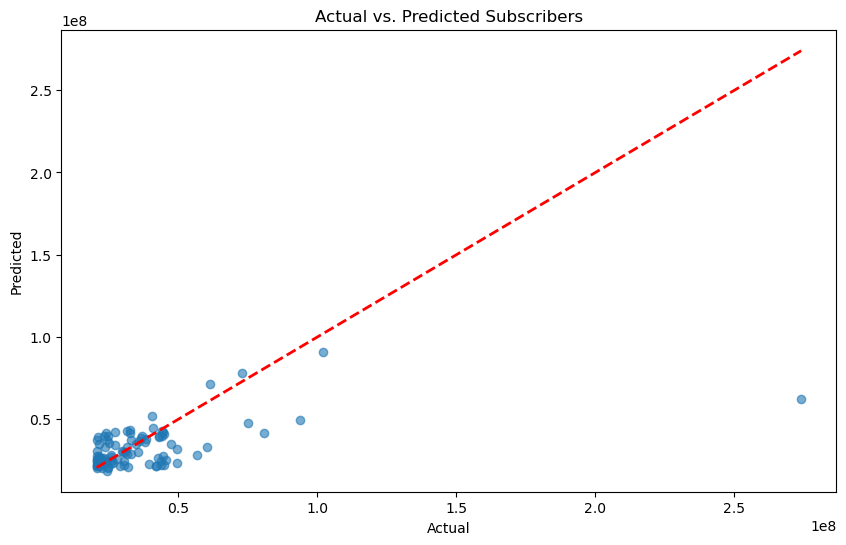

In [23]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Subscribers')
plt.show()

In [24]:
# Function to predict subscribers and channel name for new input data
def predict_subscribers_and_channel(total_videos, views):
    input_data = {
        'TOTAL_NUMBER_OF_VIDEOS': total_videos,
        'VIEWS': views
    }
    input_features = pd.DataFrame(input_data, index=[0])
    try:
        predicted_subscribers = model.predict(input_features)[0]  # Single prediction array
        # Find the closest match for subscribers (assuming small rounding differences)
        closest_match = df.iloc[(df['SUBSCRIBERS'] - predicted_subscribers).abs().argsort()[:1]].iloc[0]
        predicted_channel_name = closest_match['NAME_OF_CHANNEL']
    except ValueError as e:
        print("Error during prediction:", e)
        return None, None
    return predicted_subscribers, predicted_channel_name


In [25]:
# Interactive input and prediction loop
while True:
    try:
        total_videos = int(input("Enter total number of videos: "))
        views = int(input("Enter total views: "))
    except ValueError:
        print("Please enter valid integers for total videos and views.")
        continue
    
    predicted_subscribers, predicted_channel_name = predict_subscribers_and_channel(total_videos, views)
    if predicted_subscribers is not None and predicted_channel_name is not None:
        print(f"Predicted Total Subscribers: {predicted_subscribers:.2f}")
        print(f"Predicted Channel Name: {predicted_channel_name}")
    else:
        print("Prediction failed. Check input data format and model consistency.")
    
    # Ask user if they want to make another prediction
    another_prediction = input("Do you want to make another prediction? (yes/no): ").lower()
    if another_prediction != 'yes':
        break

Enter total number of videos: 799
Enter total views: 50980000000
Predicted Total Subscribers: 62239776.48
Predicted Channel Name: Infobells - Hindi
Do you want to make another prediction? (yes/no): no
